In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("diabetes.csv",index_col=False)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,No
1,8,183,64,0,0,23.3,0.672,32,Yes
2,1,89,66,23,94,28.1,0.167,21,No
3,0,137,40,35,168,43.1,2.288,33,Yes
4,5,116,74,0,0,25.6,0.201,30,No
5,3,78,50,32,88,31.0,0.248,26,Yes
6,10,115,0,0,0,35.3,0.134,29,No
7,2,197,70,45,543,30.5,0.158,53,Yes
8,8,125,96,0,0,0.0,0.232,54,Yes
9,4,110,92,0,0,37.6,0.191,30,No


In [4]:
print(data.shape)

(767, 9)


In [5]:
print(data.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [6]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


In [7]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


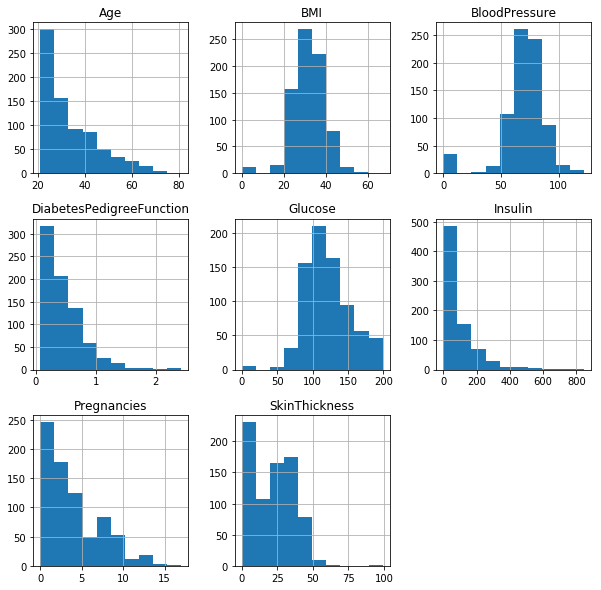

In [8]:
data.hist(figsize=(10,10)) #Plots histogram 
plt.show()

In [9]:
print(data.eq(0).sum()) # null values in the data

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
data["Glucose"].replace(to_replace = 0,value = data["Glucose"].median(),inplace = True)
data["BloodPressure"].replace(to_replace = 0,value = data["BloodPressure"].median(),inplace = True)
data["BMI"].replace(to_replace = 0,value = data["BMI"].median(),inplace = True)
data["SkinThickness"].replace(to_replace = 0,value = data["SkinThickness"].median(),inplace = True)
data.drop(["Insulin"],axis=1,inplace = True)

In [11]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,26.6,0.351,31,No
1,8,183,64,23,23.3,0.672,32,Yes
2,1,89,66,23,28.1,0.167,21,No
3,0,137,40,35,43.1,2.288,33,Yes
4,5,116,74,23,25.6,0.201,30,No
5,3,78,50,32,31.0,0.248,26,Yes
6,10,115,72,23,35.3,0.134,29,No
7,2,197,70,45,30.5,0.158,53,Yes
8,8,125,96,23,32.0,0.232,54,Yes
9,4,110,92,23,37.6,0.191,30,No


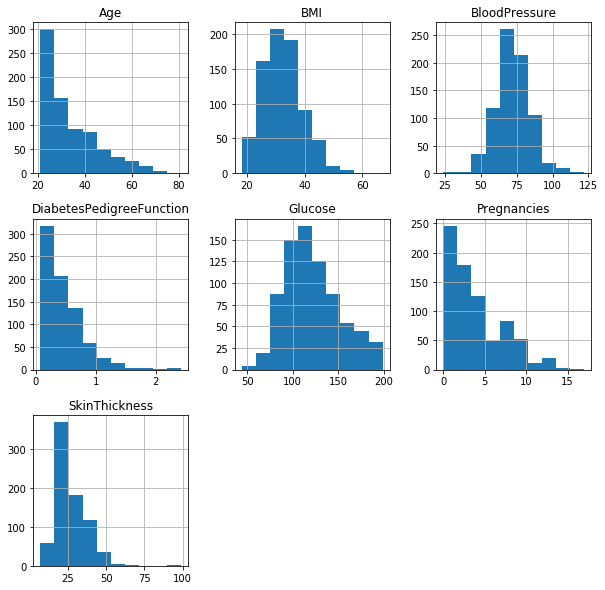

In [12]:
data.hist(figsize = (10,10))
plt.show()

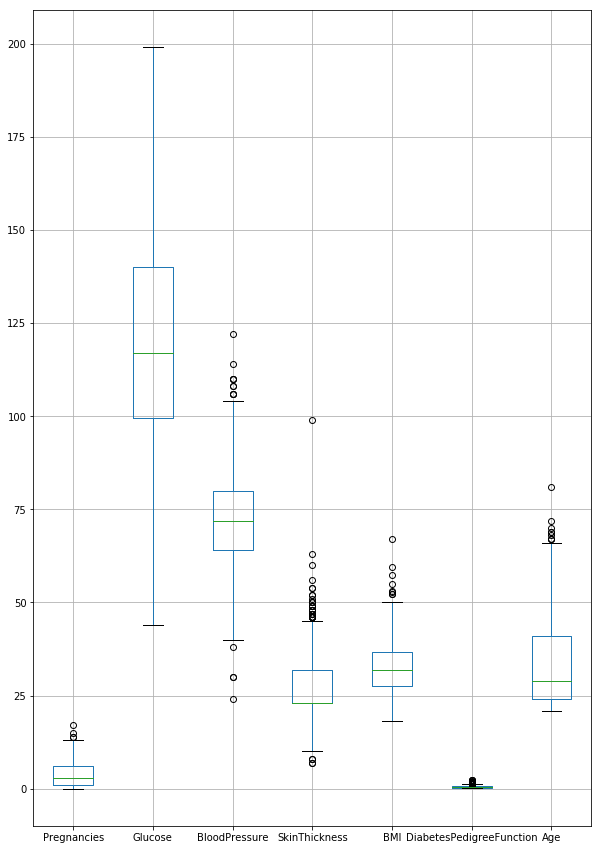

In [13]:
data.boxplot(figsize = (10,15))
plt.show()

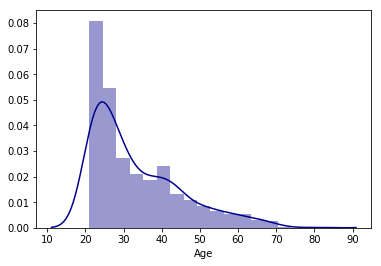

In [14]:
sns.distplot(data["Age"],hist = True,kde = True,color = "darkblue")

In [15]:
for col in ['Pregnancies','BloodPressure','SkinThickness', 'BMI','Age']:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col] = np.clip(data[col],percentiles[0],percentiles[1])
# this code was to remove outliers from data

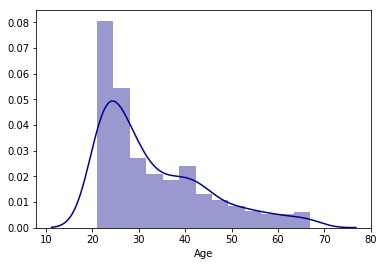

In [16]:
sns.distplot(data["Age"],hist = True,kde = True,color = "darkblue")

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.831812,121.621904,72.410691,27.234316,32.400464,0.471674,33.183833
std,3.338067,30.443252,11.709697,8.743843,6.671910,0.331497,11.637086
min,0.000000,44.000000,44.000000,10.000000,19.500000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,23.000000,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,36.600000,0.625000,41.000000
max,13.000000,199.000000,106.000000,51.340000,50.782000,2.420000,67.000000


Change Yes and no into 0 and 1

In [18]:
le = LabelEncoder()

In [19]:
data["Outcome"]=le.fit_transform(data["Outcome"])

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29.0,26.6,0.351,31,0
1,8,183,64,23.0,23.3,0.672,32,1
2,1,89,66,23.0,28.1,0.167,21,0
3,0,137,44,35.0,43.1,2.288,33,1
4,5,116,74,23.0,25.6,0.201,30,0


In [21]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,0:-1],data.iloc[:,-1],test_size = 0.20,random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(613, 7)
(154, 7)
(613,)
(154,)


In [22]:
models = []
models.append(("lr",LogisticRegression()))
models.append(("decision tree",DecisionTreeClassifier()))
models.append(("svm",SVC(gamma="auto")))
models.append(("knn",KNeighborsClassifier()))
models.append(("naive bayes",GaussianNB()))
models.append(("random forest",RandomForestClassifier()))
for (name,model) in models:
    kfold= KFold(n_splits = 10,random_state =7)
    cross_val_sc=cross_val_score(model,X_train,y_train,scoring = "accuracy",cv = kfold)
    print("{}:acc:{}(standard deviation:{})".format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr:acc:0.740481226864093(standard deviation:0.07239817009408657)
decision tree:acc:0.6754098360655737(standard deviation:0.04243423085515951)
svm:acc:0.6457694341618191(standard deviation:0.06599166260861399)
knn:acc:0.732469592808038(standard deviation:0.07294111567425018)
naive bayes:acc:0.7503701745108409(standard deviation:0.06273923098301763)
random forest:acc:0.727472236911687(standard deviation:0.05623008908586074)


In [23]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125937,0.211313,0.039694,0.025192,-0.034762,0.549266,0.218981
Glucose,0.125937,1.000000,0.219989,0.159246,0.233282,0.136884,0.267494,0.492079
BloodPressure,0.211313,0.219989,1.000000,0.161918,0.290596,0.001085,0.333838,0.170113
SkinThickness,0.039694,0.159246,0.161918,1.000000,0.561981,0.137595,0.042026,0.186819
BMI,0.025192,0.233282,0.290596,0.561981,1.000000,0.147735,0.033894,0.312978
DiabetesPedigreeFunction,-0.034762,0.136884,0.001085,0.137595,0.147735,1.000000,0.032789,0.173245
Age,0.549266,0.267494,0.333838,0.042026,0.033894,0.032789,1.000000,0.240264
Outcome,0.218981,0.492079,0.170113,0.186819,0.312978,0.173245,0.240264,1.000000


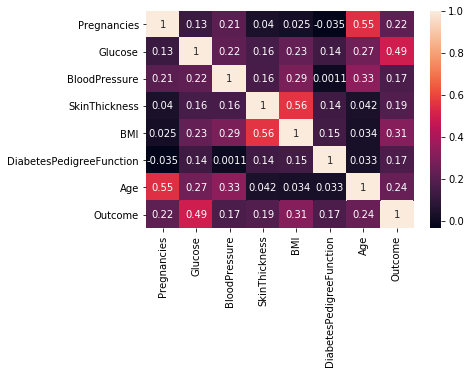

In [25]:
sns.heatmap(correlation,annot = True)

### Now make our model usign Pregnancies,Glucose,BMI and Age 

In [28]:
modified_X_train = X_train[["Glucose","BMI","Age"]]
modified_X_test = X_test[["Glucose","BMI","Age"]]

In [33]:
scaler = StandardScaler()
scaler.fit(modified_X_train)
scaled_X_train = scaler.transform(modified_X_train)
scaler.fit(modified_X_train)
scaled_X_test = scaler.transform(modified_X_test)

In [34]:
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))

acc=[]
nam=[]


for name,model in models:
  kfold=KFold(n_splits=10,random_state=7) 
  cross_val_sc=cross_val_score(model,scaled_X_train,y_train,scoring='accuracy',cv=kfold)
  print('{} : accuracy:{}( standard deviation:{})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))
  acc.append(cross_val_sc.mean()*100)
  nam.append(name)


lr : accuracy:0.760074034902168( standard deviation:0.06953974499959363)
decision tree : accuracy:0.6719725013220519( standard deviation:0.06331059798768043)
svm : accuracy:0.7650449497620307( standard deviation:0.062338431979468846)
knn : accuracy:0.7029878371232152( standard deviation:0.0716984235327592)
naive bayes : accuracy:0.7748281332628238( standard deviation:0.06268513430723137)
Random Forest : accuracy:0.6965362242199894( standard deviation:0.06777204907359353)


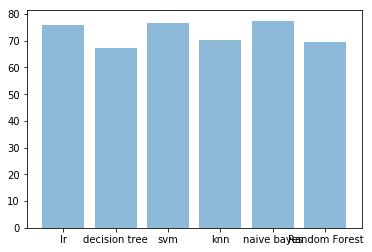

In [46]:
height = np.arange(0,101,5)
plt.bar(np.arange(len(nam)),acc,align = "center",alpha = 0.5)
plt.xticks(np.arange(len(nam)),nam)
plt.show()

In [48]:
model = LogisticRegression()
model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)

In [49]:
print(confusion_matrix(y_test,y_pred))

[[90 14]
 [22 28]]
